## Chrun

# Plan
* Explorar los datos
* Cargarlos
* Unir los datos
* Adaptar codigo modelos
* Validar resultados
* Generar pronostico
* Adaptar entregable

* Correlación cruza
* SARIMAX

###  Tener en cuenta
* Seleccion quitar los que tienen poca información

### Pasos a seguir
* Agregar modelos
* Partir entre entremaiento y testing
* Calcular Errores
* Seleccionar mejor metodo por serie y pronosticar

In [146]:
#cargar librerias
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error
#from fbprophet import Prophet
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing
import statsmodels.api as sm

In [101]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
TablaMarClient= pd.read_csv(f'CR_Nodos2.csv',sep=';')

In [3]:
TablaMarClient.head(2)

,NODO,MARCACIONES,CLIENTES,CONTACT,MES,ANIO,DIA,FECHA
0,VE2,139,286,48.6,9,2020,1,2020-09-01
1,CQ59,3,15,20.0,9,2020,1,2020-09-01


In [4]:
len(TablaMarClient)

186849

In [5]:
#carga de los datos
TablaChurn=pd.read_csv(f'N3_Tomas_Rojas.csv',sep=';')

In [6]:
len(TablaChurn)

180221

In [7]:
TablaChurn

,E_distrito,Nodo,Fecha,Value,anio,mes,dia,fecha2
0,ACACIAS NORTE,2IA,1/1/2020,-6.0,2020.0,1.0,1.0,2020-01-01
1,ACACIAS NORTE,3IA,1/1/2020,-2.0,2020.0,1.0,1.0,2020-01-01
2,ACACIAS NORTE,AMI,1/1/2020,-8.0,2020.0,1.0,1.0,2020-01-01
3,ACACIAS NORTE,FLS,1/1/2020,-11.0,2020.0,1.0,1.0,2020-01-01
4,ACACIAS NORTE,IAT,1/1/2020,-14.0,2020.0,1.0,1.0,2020-01-01
...,...,...,...,...,...,...,...,...
180216,ZIPAQUIRA DTH,HNEMOC,1/9/2021,1.0,NaN,NaN,NaN,2021-09-01
180217,ZIPAQUIRA DTH,HTABIO,1/9/2021,-2.0,NaN,NaN,NaN,2021-09-01
180218,ZIPAQUIRA DTH,HTENJO,1/9/2021,-15.0,NaN,NaN,NaN,2021-09-01
180219,ZIPAQUIRA DTH,HZIPAQ,1/9/2021,0.0,NaN,NaN,NaN,2021-09-01


In [8]:
TablaFinal=TablaChurn.merge(TablaMarClient,left_on=['Nodo','fecha2'],right_on=['NODO','FECHA'], how='left')
#TablaFinal=TablaChurn.merge(TablaMarClient,left_on='Nodo',right_on='NODO', how='left')

In [9]:
TablaFinal[TablaFinal['NODO'].isnull()].head(10)

,E_distrito,Nodo,Fecha,Value,anio,mes,dia,fecha2,NODO,MARCACIONES,CLIENTES,CONTACT,MES,ANIO,DIA,FECHA
0,ACACIAS NORTE,2IA,1/1/2020,-6.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACACIAS NORTE,3IA,1/1/2020,-2.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACACIAS NORTE,AMI,1/1/2020,-8.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACACIAS NORTE,FLS,1/1/2020,-11.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACACIAS NORTE,IAT,1/1/2020,-14.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ACACIAS NORTE,IIA,1/1/2020,1.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ACACIAS NORTE,INB,1/1/2020,-7.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ACACIAS NORTE,IND,1/1/2020,0.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ACACIAS NORTE,INY,1/1/2020,-2.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ACACIAS NORTE,LBY,1/1/2020,0.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(TablaFinal)

180221

In [11]:
# preprocesamiento

In [12]:
TablaFinal.drop(columns=['Fecha','anio','mes','dia','ANIO','MES','DIA','FECHA','NODO'], inplace=True)

In [13]:
TablaFinal.sample(10)

,E_distrito,Nodo,Value,fecha2,MARCACIONES,CLIENTES,CONTACT
22202,JAVERIANA,2C4013,-8.0,2020-10-01,25.0,114.0,21.930
12410,DISTRITO BGA 3,A2A,-18.0,2020-06-01,NaN,NaN,NaN
134113,DOSQUEBRADAS2,AAZ,-22.0,2021-07-01,62.0,478.0,12.970
123641,QUIRIGUA,AF14A,-1.0,2021-06-01,161.0,250.0,64.400
60281,VILLAVICENCIO ORIENTE,RP27,-2.0,2021-02-01,12.0,35.0,34.280
15639,MEDELLIN SURORIENTAL,OPA,0.0,2020-07-01,NaN,NaN,NaN
238,BOLIVAR DISTRITO 1,7BD,-3.0,2020-01-01,NaN,NaN,NaN
81860,CESAR DISTRITO 4,VTE,-14.0,2021-04-01,91.0,544.0,16.720
150296,CORDOBA SUCRE DISTRITO 13,HSAHAX,-6.0,2021-08-01,53.0,894.0,5.928
149705,CHIQUINQUIRA DTH,HTOGUI,0.0,2021-08-01,6.0,46.0,13.040


In [14]:
# colocar la fecha como index
TablaFinal.set_index('fecha2',inplace=True)

In [15]:
TablaFinal.index=pd.to_datetime(TablaFinal.index)

###  separación Entrenamiento y testing

In [71]:
fechaMaxima=max(TablaFinal.index)
fechaMaxima

Timestamp('2021-09-01 00:00:00')

In [72]:
TablaFinal.index.unique()[-4]

Timestamp('2021-06-01 00:00:00')

In [73]:
fechaTrain=TablaFinal.index.unique()[-4]
fechaTest=TablaFinal.index.unique()[-3]

In [74]:
print (fechaTrain,fechaTest)

2021-06-01 00:00:00 2021-07-01 00:00:00


### Seleccion de Nodos
* Nodos con información en los últimos 3 meses
* Nodos con más de 7 registros (por entrenamiento y pruebas)

In [19]:
# Nodos con información en los últimos 3 meses
Resumen=TablaFinal.reset_index()[['fecha2','Nodo']].groupby('Nodo').agg(['max','count'])

In [20]:
Resumen.head(2)

fecha2      
            max count
Nodo                 
01J  2021-09-01     9
01S  2021-09-01    21

In [21]:
Resumen.columns = Resumen.columns.droplevel(0)

In [22]:
Resumen['max'].value_counts()

2021-09-01    18465
2021-01-01       88
2021-03-01       20
2021-04-01       16
2021-05-01       11
2021-02-01        8
2020-04-01        2
2020-09-01        1
2020-08-01        1
Name: max, dtype: int64

In [23]:
Resumen['sel']=np.where(Resumen['max']<=fechaTest,'sinInfoReciente','nodoValido')

In [24]:
Resumen['sel'].value_counts()

nodoValido         18465
sinInfoReciente      147
Name: sel, dtype: int64

In [25]:
# Nodos con más de 7 registros (por entrenamiento y pruebas)

In [26]:
Resumen['count'].value_counts()

9     13600
21     2302
1       862
2       452
3       391
6       249
4       219
7       174
5       171
8        98
14       18
15       17
11       14
13       12
10        9
20        8
16        7
12        4
17        4
18        1
Name: count, dtype: int64

In [27]:
Resumen['sel']=np.where(Resumen['sel']=='nodoValido', np.where(Resumen['count']<7,'sinRegSuf','nodoValido'),Resumen['sel'])

In [28]:
Resumen['sel'].value_counts()

nodoValido         16264
sinRegSuf           2201
sinInfoReciente      147
Name: sel, dtype: int64

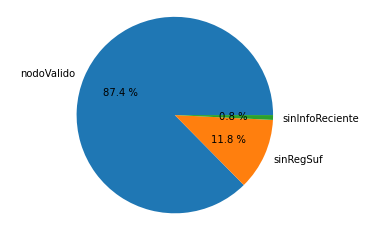

In [29]:
A = Resumen['sel'].value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [30]:
Resumen.head()

,max,count,sel
Nodo,,,
01J,2021-09-01,9,nodoValido
01S,2021-09-01,21,nodoValido
02J,2021-09-01,9,nodoValido
02S,2021-09-01,21,nodoValido
03J,2021-09-01,9,nodoValido


In [31]:
TablaFinal=TablaFinal.merge(Resumen['sel'], left_on='Nodo', right_index=True,how='left')

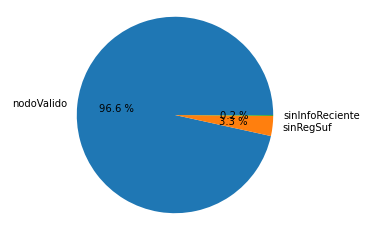

In [32]:
A = TablaFinal['sel'].value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [33]:
TablaFinal=TablaFinal[TablaFinal['sel']=='nodoValido']

In [75]:
TablaTrain=TablaFinal[TablaFinal.index <= fechaTrain]
TablaTest=TablaFinal[TablaFinal.index >= fechaTest]

### indices

In [76]:
#ind = pd.date_range(TablaFinal.index.max()+ relativedelta(months=1), periods = 4, freq ='M', name='FEC_MUESTRA')[1:]
ind = pd.date_range(TablaTrain.index.max(), periods = 4, freq ='MS', name='FECHA')[1:]
ind

DatetimeIndex(['2021-07-01', '2021-08-01', '2021-09-01'], dtype='datetime64[ns]', name='FEC_MUESTRA', freq='MS')

In [77]:
TablaFinal.index.max()

Timestamp('2021-09-01 00:00:00')

#### Predicciones

In [78]:
final = pd.DataFrame()
finalErrores = {}
grouped =TablaTrain[['Nodo','Value']].groupby('Nodo')
groupedTest =TablaTest[['Nodo','Value']].groupby('Nodo')

In [94]:
metodos=['ARIMA','ES','HOLT','ES_ajTend']

In [96]:
i=0
for g in grouped.groups:
    if i>=30:
        continue
    if i%10==0:
        print(i)    
    dicNodo={}    
    group = grouped.get_group(g) 
    groupTest = groupedTest.get_group(g) 
    for metodo in metodos:
        dicMetodo={}  
        
        if metodo== 'ARIMA':
            model=auto_arima(group['Value'],trace=False)
            model.fit(group['Value'])  
            forecast=pd.DataFrame(model.predict(n_periods = 3),index=ind)
        elif metodo== 'ES':
            model = SimpleExpSmoothing(group['Value'])
            #model.fit(smoothing_level=.5)
            forecast=pd.DataFrame(model.fit(smoothing_level=.5).forecast(3),index=ind)
        elif metodo== 'HOLT':
            model = Holt(group['Value'])            
            forecast=pd.DataFrame(model.fit(optimized=True).forecast(3),index=ind)
        elif metodo== 'ES_ajTend':
            model = ExponentialSmoothing(group['Value'],trend='add', seasonal=None, damped=True)
            forecast=pd.DataFrame(model.fit().forecast(3),index=ind)
        elif metodo=='ARIMAX'
            #model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
            model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),exog=)
            results=model.fit()
        #print(g)
        #print(forecast)
        forecast.columns = ['pred']  
        forecast['Nodo']=g
        forecast['Metodo']=metodo
        if i==0:
            final=forecast
        else:
            final=final.append(forecast)      

        # Errores
        dicMetodo['RMSE']=mean_squared_error(groupTest['Value'],forecast['pred'], squared=False)
        dicMetodo['MAPE']=mean_absolute_percentage_error(groupTest['Value'],forecast['pred'])    
        dicNodo[metodo]=dicMetodo    
        finalErrores[g]=dicNodo
        
        i=i+1
   

0
20


In [97]:
final

,pred,Nodo,Metodo
FEC_MUESTRA,,,
2021-07-01,-2.289786,01J,ARIMA
2021-08-01,-1.927255,01J,ARIMA
2021-09-01,-1.211110,01J,ARIMA
2021-07-01,-1.251282,01J,ES
2021-08-01,-1.251282,01J,ES
...,...,...,...
2021-08-01,0.000001,06J,HOLT
2021-09-01,0.000002,06J,HOLT
2021-07-01,-0.338102,06J,ES_ajTend


In [144]:
final[final['pred'].isnull()]

,pred,Nodo,Metodo
FEC_MUESTRA,,,


In [145]:
##### No tiene nullos

## Visualizar Resultado Nodo

In [131]:
nodo='06J'

In [132]:
finalErrores[nodo]

{'ARIMA': {'RMSE': 2.362907813126305, 'MAPE': 8506799296144272.0},
 'ES': {'RMSE': 1.3442902053229226, 'MAPE': 4878624651285841.0},
 'HOLT': {'RMSE': 1.1547013197887268, 'MAPE': 4063567208.0051017},
 'ES_ajTend': {'RMSE': 0.9541010323927027, 'MAPE': 1745999634506790.2}}

In [133]:
dfNodo_real=TablaFinal[TablaFinal['Nodo']==nodo][['Value']]

In [134]:
dfNodo_real

,Value
fecha2,
2021-01-01,0.000
2021-02-01,-3.000
2021-03-01,-6.000
2021-04-01,-7.000
2021-05-01,-1.000
2021-06-01,0.000
2021-07-01,0.000
2021-08-01,-2.000
2021-09-01,0.000


In [135]:
dfNodo=final[final['Nodo']==nodo]

In [136]:
dfNodo

,pred,Nodo,Metodo
FEC_MUESTRA,,,
2021-07-01,-2.833,06J,ARIMA
2021-08-01,-2.833,06J,ARIMA
2021-09-01,-2.833,06J,ARIMA
2021-07-01,-1.625,06J,ES
2021-08-01,-1.625,06J,ES
2021-09-01,-1.625,06J,ES
2021-07-01,0.000,06J,HOLT
2021-08-01,0.000,06J,HOLT
2021-09-01,0.000,06J,HOLT


In [137]:
dfNodo= pd.pivot_table(dfNodo.reset_index(), index='FEC_MUESTRA', columns='Metodo', values='pred')

In [138]:
dfNodo

Metodo,ARIMA,ES,ES_ajTend,HOLT
FEC_MUESTRA,,,,
2021-07-01,-2.833,-1.625,-0.338,0.000
2021-08-01,-2.833,-1.625,-0.609,0.000
2021-09-01,-2.833,-1.625,-0.825,0.000


In [139]:
dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')

,Value,ARIMA,ES,ES_ajTend,HOLT
fecha2,,,,,
2021-01-01,0.000,NaN,NaN,NaN,NaN
2021-02-01,-3.000,NaN,NaN,NaN,NaN
2021-03-01,-6.000,NaN,NaN,NaN,NaN
2021-04-01,-7.000,NaN,NaN,NaN,NaN
2021-05-01,-1.000,NaN,NaN,NaN,NaN
2021-06-01,0.000,NaN,NaN,NaN,NaN
2021-07-01,0.000,-2.833,-1.625,-0.338,0.000
2021-08-01,-2.000,-2.833,-1.625,-0.609,0.000
2021-09-01,0.000,-2.833,-1.625,-0.825,0.000


<AxesSubplot:xlabel='fecha2'>

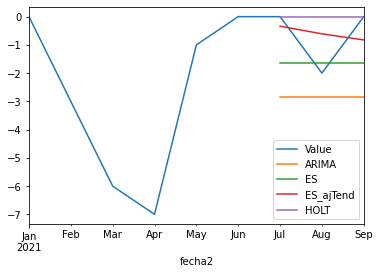

In [140]:
dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left').plot()

In [ ]:
##  revisar nodos en nan